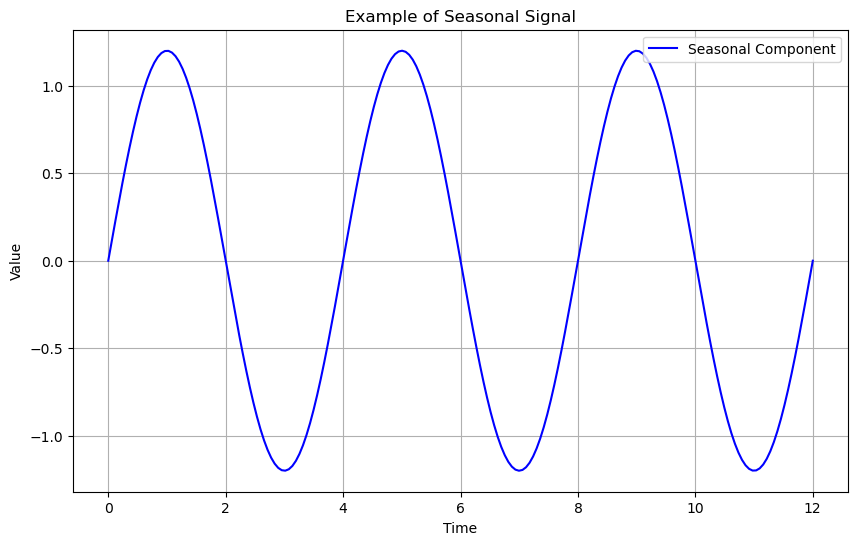

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x_axis = np.linspace(0,12, num = 200)
seasonality = 1.2 * np.sin(2*np.pi*x_axis/4)
plt.figure(figsize = (10,6))
plt.plot(x_axis,seasonality,label="Seasonal Component",color="b")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Example of Seasonal Signal")
plt.grid(True)
plt.legend()
plt.show()

In [3]:
df = pd.read_csv("daily-total-female-births.csv",parse_dates=['Date'],index_col='Date')

In [4]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


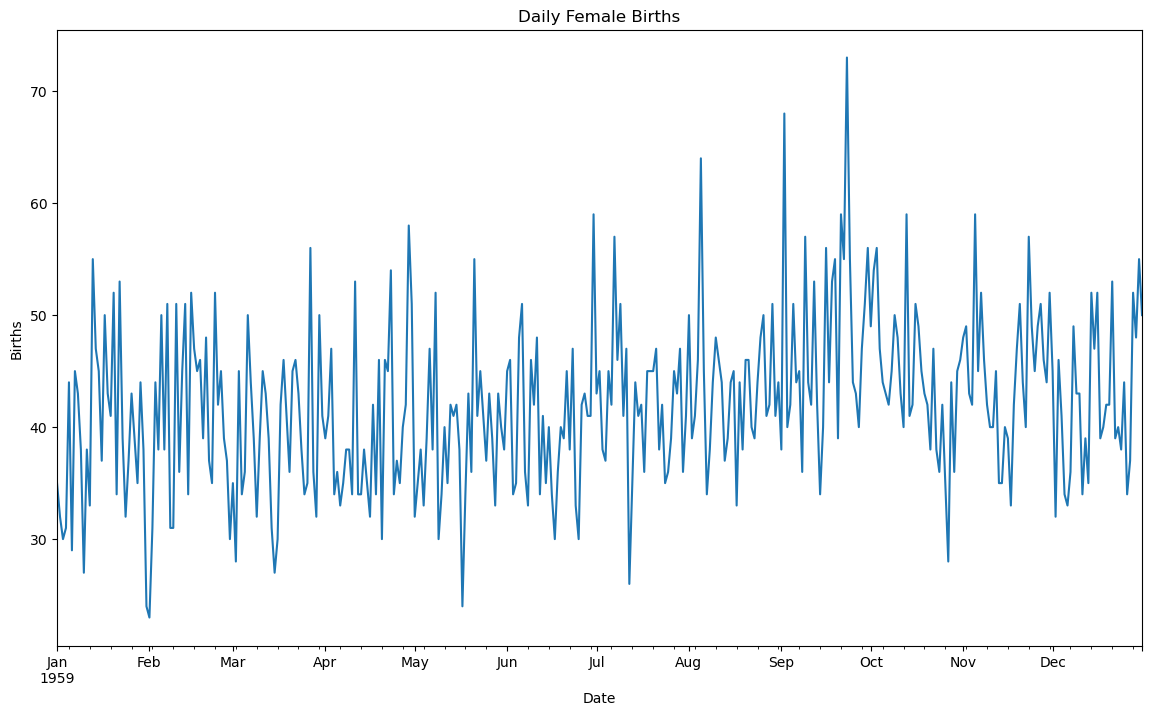

In [6]:
df.plot(title = 'Daily Female Births',figsize=(14,8),legend=None)
plt.xlabel('Date')
plt.ylabel('Births')
plt.show()

In [9]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series):
    statistic,p_value,n_lags,critical_values = kpss(series)
    print(f'KPSS Statistic:{statistic:.4f}')
    print(f'p-value:{p_value:.4f}')
    print(f'Number of lags:{n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'{key}:{value:.4f}')
    print(f'Result: The series is{" not " if p_value<0.05 else""}stationary')
kpss_test(df['Births'])

KPSS Statistic:1.6130
p-value:0.0100
Number of lags:7
Critical Values:
10%:0.3470
5%:0.4630
2.5%:0.5740
1%:0.7390
Result: The series is not stationary


C:\Users\admin\AppData\Local\Temp\ipykernel_8736\3032433017.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic,p_value,n_lags,critical_values = kpss(series)


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Births'],model = 'additive',period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

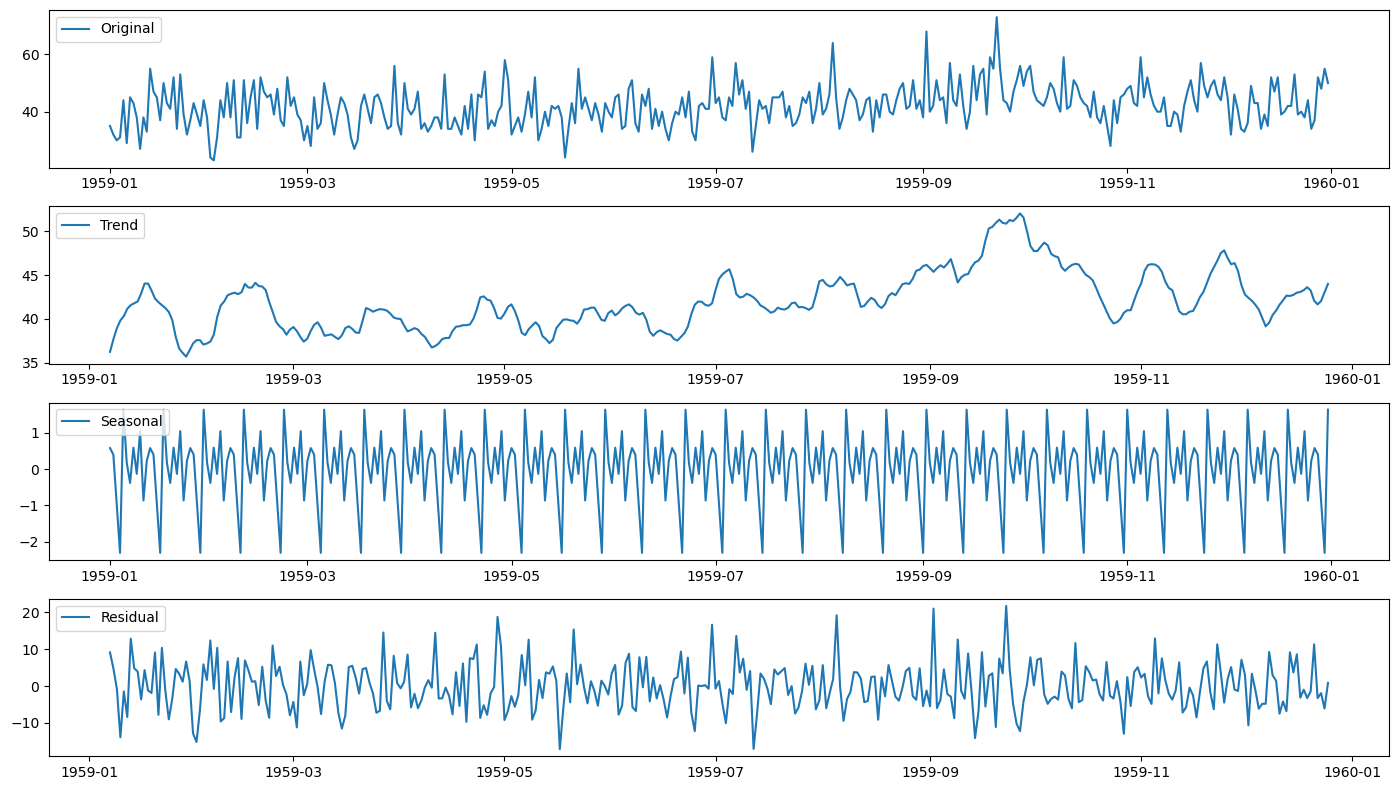

In [32]:
plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(df['Births'],label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()